# Girvan Newman

In [1]:
import glob

import numpy as np

import networkx as nx

f_name = '../../raccoon_data/weighted_raccoon_matrix_46.graphml'

Community 0
Community 1
Community 2


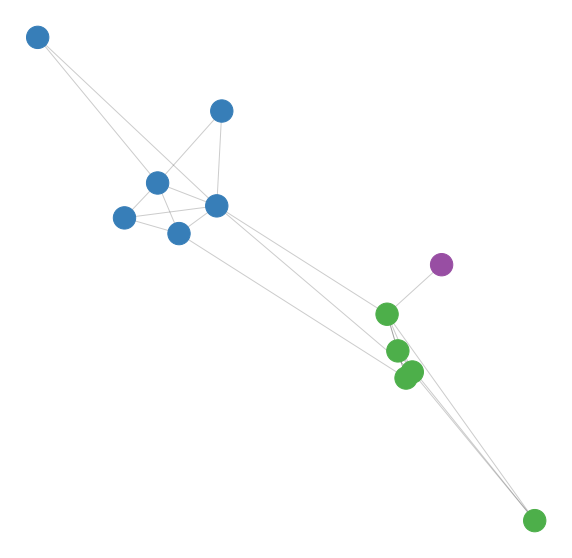

In [10]:
from networkx import edge_betweenness_centrality
from random import random
from itertools import islice
from networkx.algorithms.community.centrality import girvan_newman
import matplotlib.pyplot as plt

def most_valuable_edge(G):
    centrality = edge_betweenness_centrality(G)
    max_cent = max(centrality.values())
    # Scale the centrality values so they are between 0 and 1,
    # and add some random noise.
    centrality = {e: c / max_cent for e, c in centrality.items()}
    # Add some random noise.
    centrality = {e: c + random() for e, c in centrality.items()}
    return max(centrality, key=centrality.get)

gn_generator = girvan_newman(g, most_valuable_edge)
num_iter = 1 # Choose number of iterations
gn_communities = next(islice(gn_generator, num_iter, None))

gn_dict_communities = {}

for i, c in enumerate(gn_communities):
    print ("Community {}".format(i))
    for node in c:
        gn_dict_communities[node] = i + 1
        
for node in g:
    if node not in gn_dict_communities.keys():
        gn_dict_communities[node] = -1
        
# gn_pos = community_layout(G, gn_dict_communities) # Manually creating layout
gn_pos = nx.spring_layout(g)

from matplotlib import cm
gn_colors = []
for node in g.nodes:
    gn_colors.append(cm.Set1(gn_dict_communities[node]))
    
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(g, gn_pos, node_color=gn_colors, node_size=500)
nx.draw_networkx_edges(g, gn_pos, alpha=0.2)
plt.axis('off')
plt.show()